In [1]:
#import the libraries

import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore
from scipy.stats import iqr
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

In [2]:
#Read the data set

vehicle=pd.read_csv('vehicle.csv', sep = ',')

In [3]:
vehicle

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [4]:
vehicle.describe(include="all").T

count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN

In [5]:
#Compactness has mean and median values almost similar , it signifies that it is normally distribited and has no skewness/outlier
#circularity : it also seems to be normally distribted as mean amd median has similar values
#scatter_ratio feature seems to be having some kind of skewness and outlier
#Scaled variance 1 & 2

In [6]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [7]:
# circularity, class, hollow_ratio,max.length_rectangularity, , max.length_aspect_ratio, compactness has no missing values rest all features are having some kind of missing values 
# All attributes are of numerical type expect class.

In [8]:
vehicle.shape

(846, 19)

In [9]:
vehicle.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [10]:
vehicle.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [11]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
# Finding out the missing values.

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
vehicle[['circularity']] = imputer.fit_transform(vehicle[['circularity']])
vehicle[['distance_circularity']] = imputer.fit_transform(vehicle[['distance_circularity']])
vehicle[['radius_ratio']] = imputer.fit_transform(vehicle[['radius_ratio']])
vehicle[['pr.axis_aspect_ratio']] = imputer.fit_transform(vehicle[['pr.axis_aspect_ratio']])
vehicle[['scatter_ratio']] = imputer.fit_transform(vehicle[['scatter_ratio']])
vehicle[['elongatedness']] = imputer.fit_transform(vehicle[['elongatedness']])
vehicle[['pr.axis_rectangularity']] = imputer.fit_transform(vehicle[['pr.axis_rectangularity']])
vehicle[['scaled_variance']] = imputer.fit_transform(vehicle[['scaled_variance']])
vehicle[['scaled_variance.1']] = imputer.fit_transform(vehicle[['scaled_variance.1']])
vehicle[['scaled_radius_of_gyration']] = imputer.fit_transform(vehicle[['scaled_radius_of_gyration']])
vehicle[['scaled_radius_of_gyration.1']] = imputer.fit_transform(vehicle[['scaled_radius_of_gyration.1']])
vehicle[['skewness_about']] = imputer.fit_transform(vehicle[['skewness_about']])
vehicle[['skewness_about.1']] = imputer.fit_transform(vehicle[['skewness_about.1']])
vehicle[['skewness_about.2']] = imputer.fit_transform(vehicle[['skewness_about.2']])

In [13]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [14]:
#If you carefully observe above, our orginal dataframe vehicle and dataframe after finding the missing values , 
#we will find that , After we imputed the datfarme series , using simpleimputer, 
#we can see that the missing NaN values from our orginal vehdf datframe columns are treated and replaced using mode strategy.

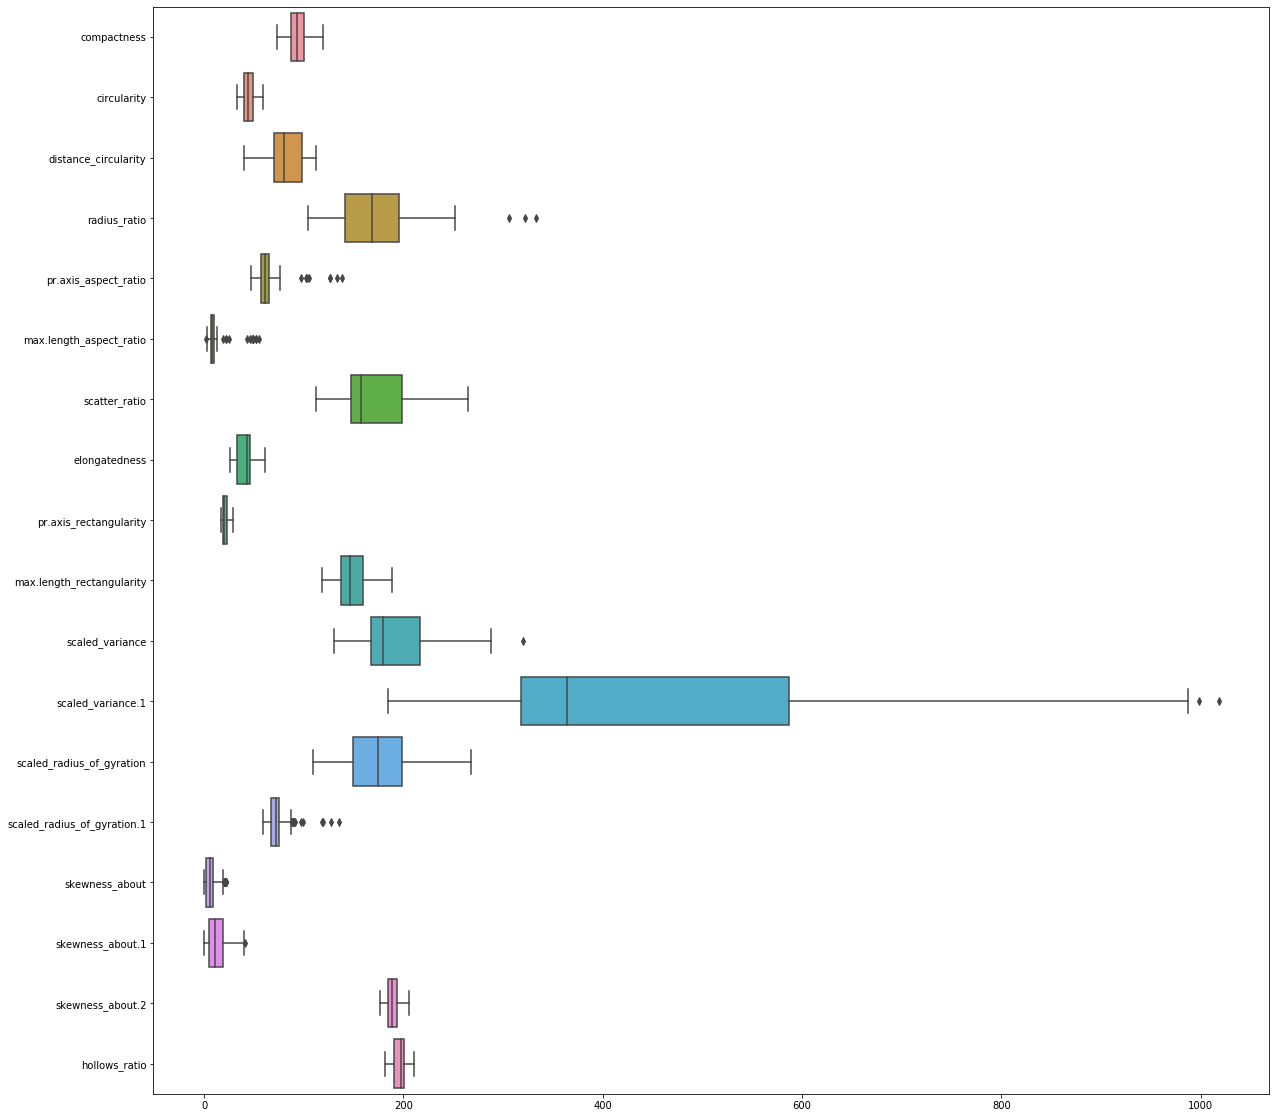

In [15]:
#Summary View of all attribute to trace out outliers

plt.figure(figsize=(20,20))
ax = sns.boxplot(data=vehicle, orient="h")

In [16]:
#pr.axis_aspect_ratio, skewness_about, max_length_aspect_ratio, skewness_about_1,
#scaled_radius_of_gyration.1, scaled_variance.1, radius_ratio, skewness_about, scaled_variance.1 are some of the attributes with outliers. 
#which is visible with all dotted points

In [17]:
#We can see that all out boxplot for all the attributes which had outlier have been treate and removed. Since no. of outliers were less we opted to remove it. 
#Generally we avoid this as it can lead to info loss in case of large data sets with large no of outliers

In [18]:
# Let's Drop Class column and see the correlation Matrix & 
# Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute

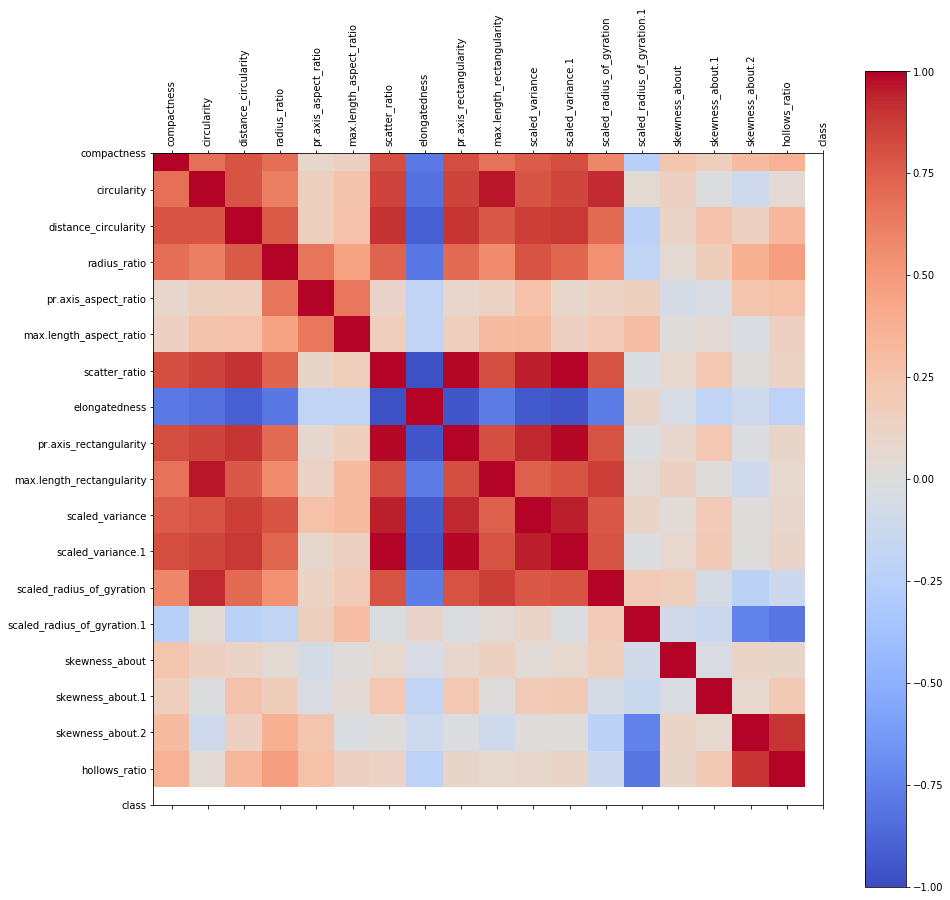

In [19]:
corr = vehicle.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(vehicle.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(vehicle.columns)
ax.set_yticklabels(vehicle.columns)
plt.show()


In [21]:
for feature in vehicle.columns: # Loop through all columns in the dataframe
    if vehicle[feature].dtype == 'object': # Only apply for columns with categorical strings
        vehicle[feature] = pd.Categorical(vehicle[feature]).codes # Replace strings with an integer

In [22]:
covMatrix = np.cov(vehicle,rowvar=False)
print(covMatrix)

[[ 6.78065662e+01  3.46204941e+01  1.02386510e+02  1.89733201e+02
   5.95205839e+00  5.61695413e+00  2.22020316e+02 -5.07287112e+01
   1.73414349e+01  8.08185544e+01  1.96942280e+02  1.18553459e+03
   1.56822459e+02 -1.53790566e+01  9.51583263e+00  1.15742922e+01
   1.51233038e+01  2.23917272e+01 -1.95394967e-01]
 [ 3.46204941e+01  3.76252587e+01  7.65686612e+01  1.27223538e+02
   7.41481040e+00  7.08999289e+00  1.72709659e+02 -3.93819208e+01
   1.34153156e+01  8.56496155e+01  1.53253466e+02  9.07604107e+02
   1.85040913e+02  2.41158675e+00  4.34273015e+00 -6.49222889e-01
  -3.98672070e+00  2.06782289e+00 -6.88246593e-01]
 [ 1.02386510e+02  7.65686612e+01  2.47776010e+02  4.03300589e+02
   1.96525919e+01  1.91606656e+01  4.72569263e+02 -1.12070961e+02
   3.63883544e+01  1.77003805e+02  4.25438148e+02  2.46464494e+03
   3.61664563e+02 -2.65512088e+01  8.78410059e+00  3.73311445e+01
   1.40963866e+01  3.88861727e+01 -7.17304530e-01]
 [ 1.89733201e+02  1.27223538e+02  4.03300589e+02  1.11

In [23]:
# Strong/fare Correlation:
#      - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
#      - skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
#      - ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
#      - compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
#      - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
#      - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
#      - scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
#      - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95

# Little To No Correlation:
#      -max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5
#      - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
#      - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
#      - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
#      - skewness_about & skewness_about.1 not be correlated
#      - skewness_about.1 and skewness_about.2 are not correlated.


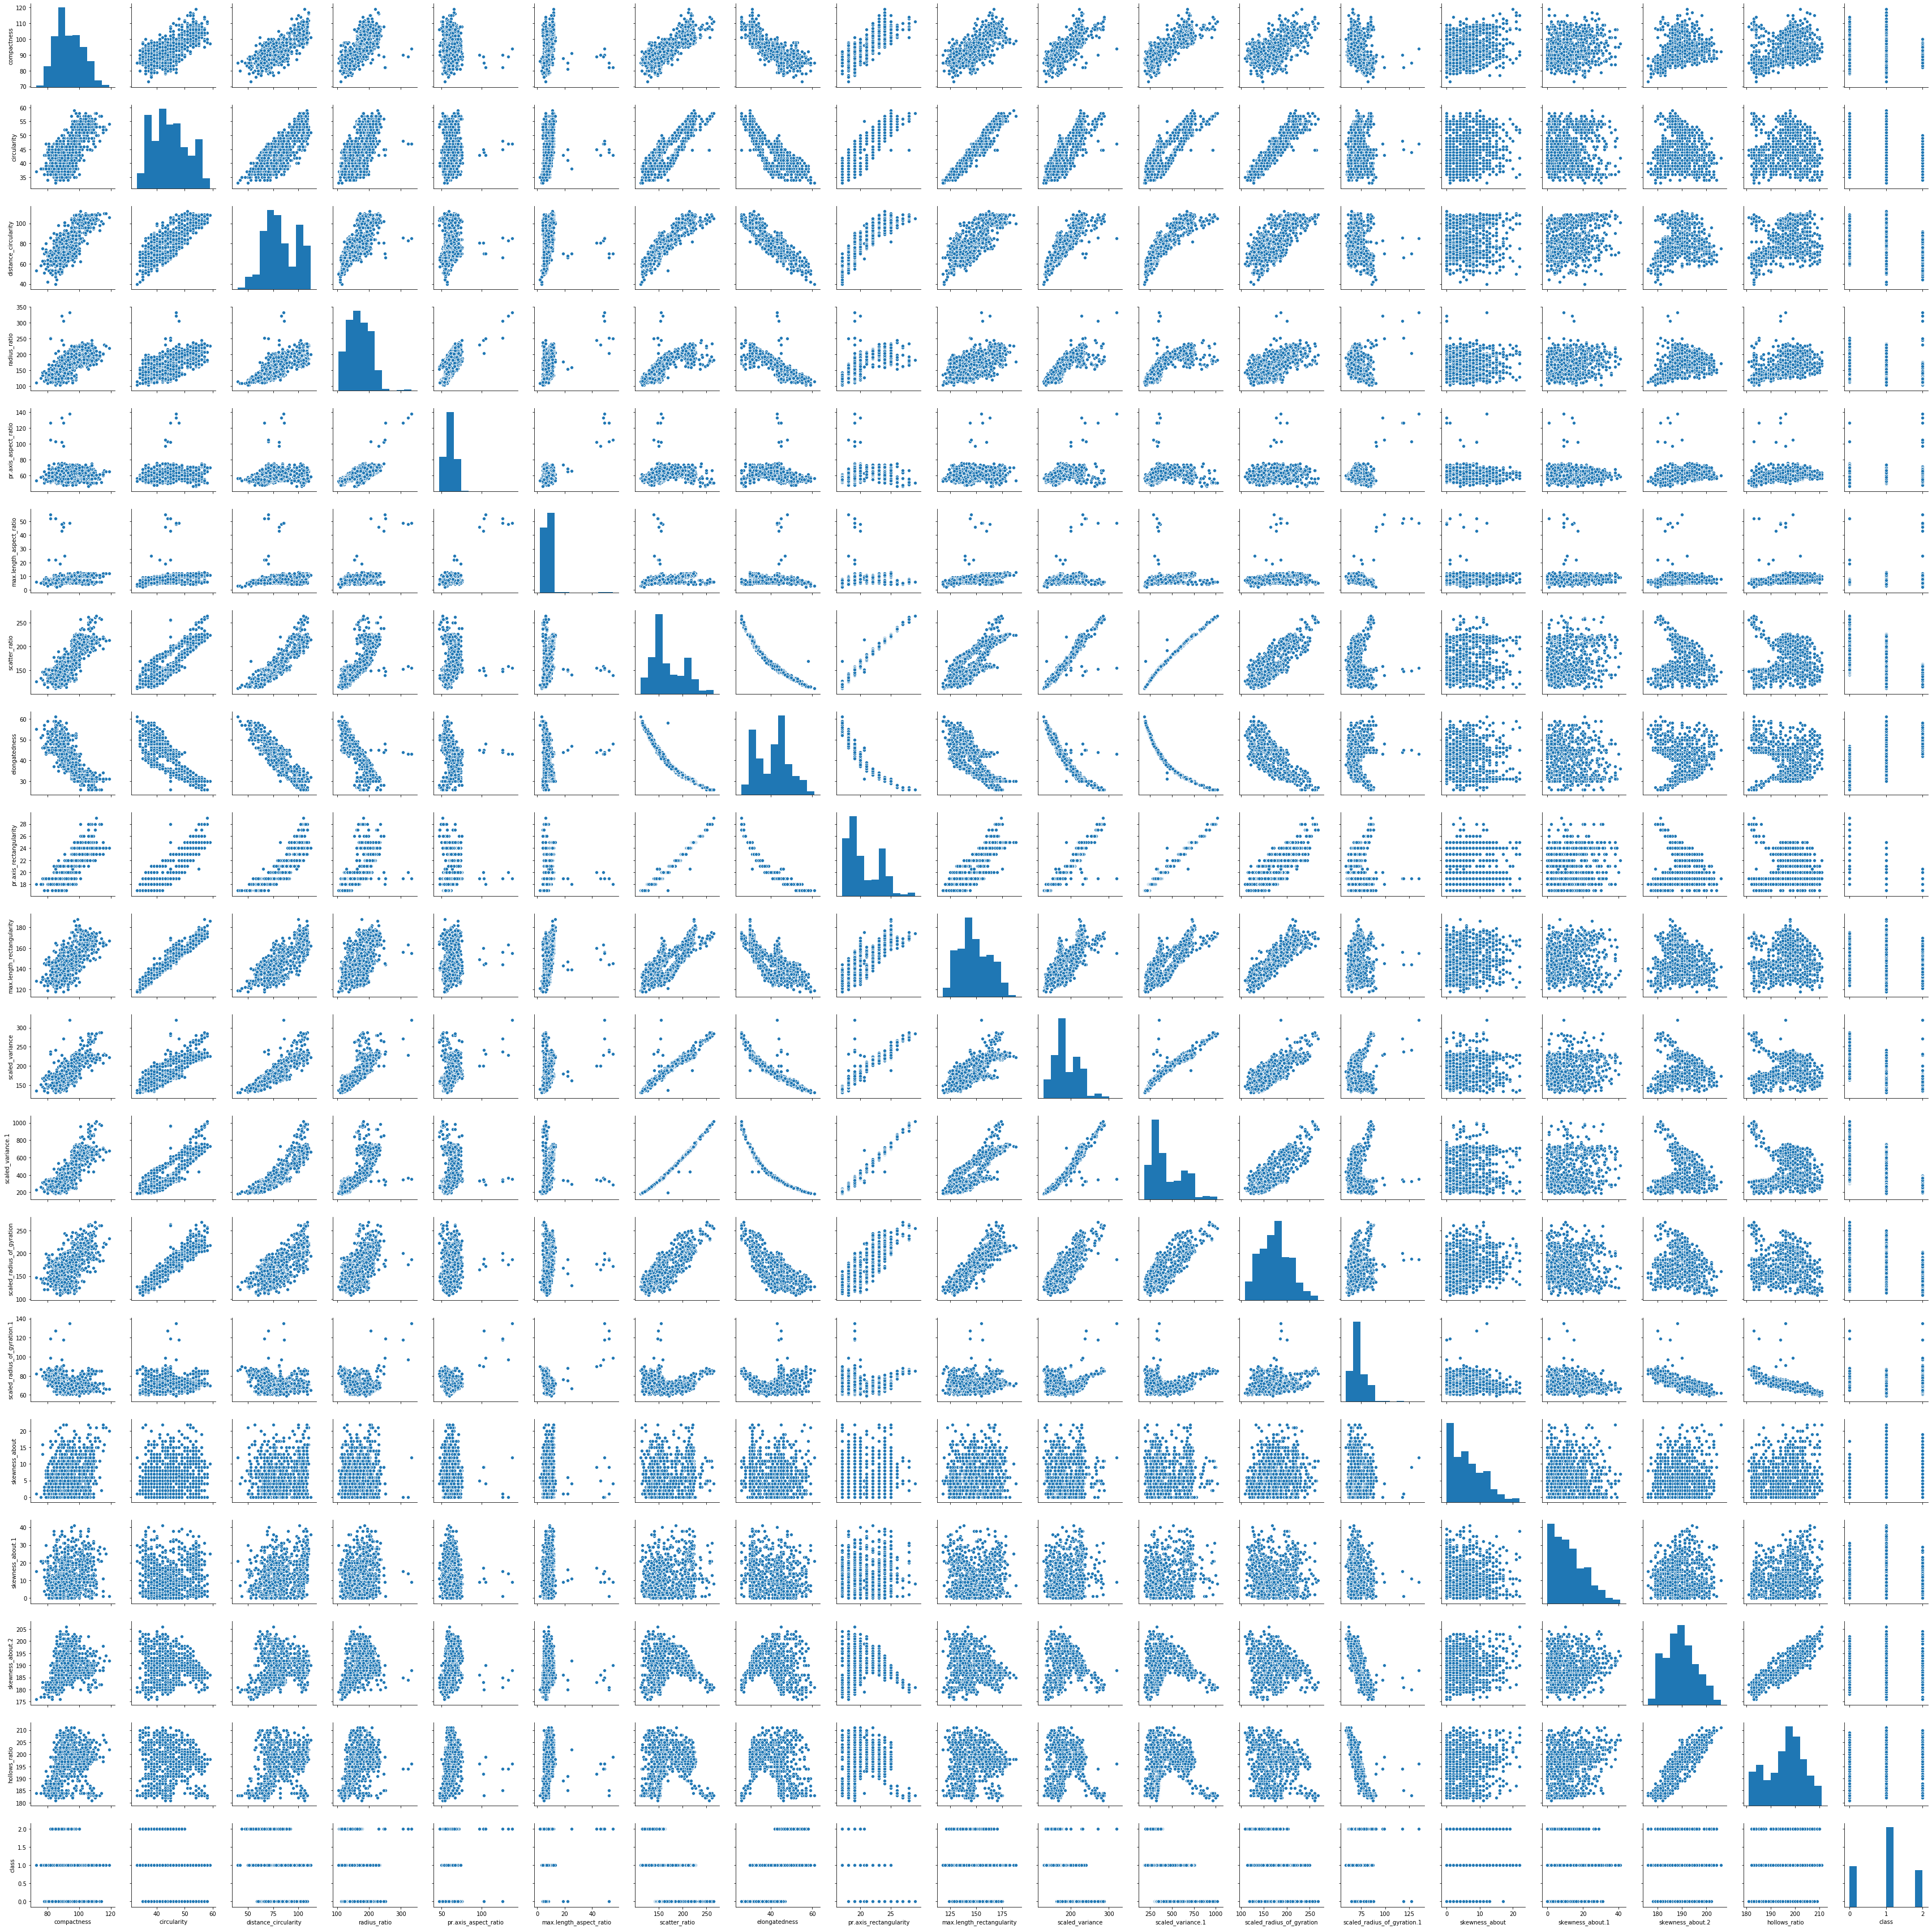

In [24]:
sns.pairplot(vehicle.iloc[:,:])
plt.show()

In [25]:
#As observed in our correlation heatmap our pairplot seems to validate the same. Scaled Variance & Scaled Variance.1 seems to be have very strong positive correlation with value of 0.98. 
#skewness_about_2 and hollow_ratio also seems to have strong positive correation with coeff: 0.89

#scatter_ratio and elongatedness seems to be have very strong negative correlation. elongatedness and pr.axis_rectangularity seems to have strong negative correlation with val of

#We found from our pairplot analysis that, Scaled Variance & Scaled Variance.1 and elongatedness and pr.axis_rectangularity to be strongly correlated , 
#so they need to dropped of treated carefully before we go for model building.

#Most of the data attributes seems to be normally distributed
#scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skwed .
#pr.axis_rectangularity seems to be haing outliers as there are some gaps found in the plot.

In [26]:
# From above correlation matrix we can see that there are many features which are highly correlated. 
# if we carefully analyse, we will find that many features are there which having more than 0.9 correlation. 
# so we can decide to get rid of those columns whose correlation is +-0.9 or above.There are 8 such columns:

# 1. max.length_rectangularity
# 2. scaled_radius_of_gyration
# 3. skewness_about.2
# 4. scatter_ratio
# 5. elongatedness
# 6. pr.axis_rectangularity
# 7. scaled_variance
# 8. scaled_variance.1

In [27]:
vehicle.groupby("class").count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
0              218          218                   218           218   
1              429          429                   429           429   
2              199          199                   199           199   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
0                       218                      218            218   
1                       429                      429            429   
2                       199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
0                218                     218                        218   
1                429                     429                        429   
2                199                     199                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
0                  218                218                        218   
1                  429                429                        429   
2                  199                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
0                              218             218               218   
1                              429             429               429   
2                              199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
0                   218            218  
1                   429            429  
2                   199            199

In [28]:
# Spliting the data into Train and test

X = vehicle.drop("class" , axis=1)
y = vehicle["class"]   
test_size = 0.30 # taking 70:30 training and test set
seed = 100  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [29]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= 1, kernel='rbf', gamma= 1)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[  0  72   0]
 [  0 119   0]
 [  0  63   0]]
Accuracy: 0.468503937007874
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.47      1.00      0.64       119
           2       0.00      0.00      0.00        63

    accuracy                           0.47       254
   macro avg       0.16      0.33      0.21       254
weighted avg       0.22      0.47      0.30       254



In [30]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [31]:
from scipy.stats import zscore
vehicle=X.apply(zscore)
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [32]:
covMatrix = np.cov(vehicle,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68623251  0.79084412  0.69065619  0.09181254  0.14842463
   0.81319623 -0.78957587  0.81459888  0.67694334  0.76367265  0.81686705
   0.58584865 -0.25036693  0.23596607  0.15757316  0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.15354334  0.25150523
   0.84921058 -0.82287347  0.84597164  0.96308094  0.7977645   0.83951746
   0.92798524  0.05270433  0.14456452 -0.01186527 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.15858456  0.26486339
   0.90547061 -0.91251368  0.89418513  0.77558624  0.86300031  0.88837793
   0.70678835 -0.2261194   0.1139479   0.26586756  0.14573497  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.6643445   0.45056889
   0.73509724 -0.79072934  0.70912305  0.56987817  0.79498064  0.72100219
   0.5371705  -0.1810333   0.04877731  0.17403799  0.38258162  0.47181974]
 [ 0.09181254  0.15354334  0.15858456  0.6643445   1.00118343  0.64947191
   0.1038381  -0.18348087  0.07948

In [33]:
pca = PCA(n_components=10)
pca.fit(vehicle)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
print(pca.explained_variance_)

[9.40828822 3.01605477 1.90347881 1.18027268 0.91717407 0.53927982
 0.35856646 0.22166173 0.16003619 0.09171409]


In [35]:
print(pca.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [36]:
print(pca.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998 0.00888039 0.0050892 ]


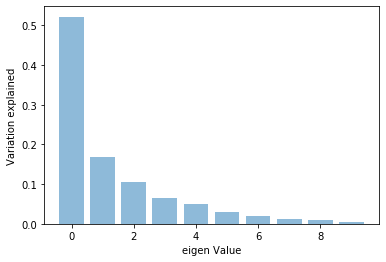

In [37]:
plt.bar(list(range(0,10)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

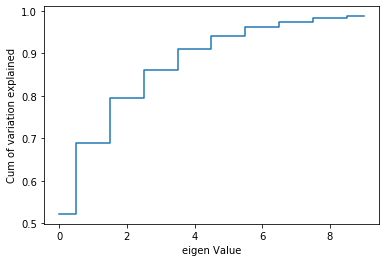

In [38]:
plt.step(list(range(0,10)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [101]:
# Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!
pca3 = PCA(n_components=7)
pca3.fit(vehicle)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(vehicle)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [102]:
Xpca3

array([[ 3.32393198e-01, -2.18638382e-01,  1.00128619e+00, ...,
         7.91062378e-02, -7.54813577e-01, -9.02186656e-01],
       [-1.59374091e+00, -4.20549398e-01, -3.69264301e-01, ...,
         6.93397240e-01, -5.19073098e-01,  3.76234233e-01],
       [ 3.76753509e+00,  1.95040767e-01,  8.82372311e-02, ...,
         7.30906518e-01,  7.05376870e-01, -3.26422538e-02],
       ...,
       [ 4.80780979e+00, -1.82373823e-03,  5.32772800e-01, ...,
        -1.34473735e+00, -2.19629919e-01,  5.72947835e-01],
       [-3.29572788e+00, -1.00880341e+00, -3.57467658e-01, ...,
         4.30752760e-02, -4.03456798e-01, -2.05108892e-01],
       [-4.76673461e+00,  3.34686477e-01, -5.68739264e-01, ...,
        -5.42871258e-02, -3.36467836e-01,  5.72769602e-02]])

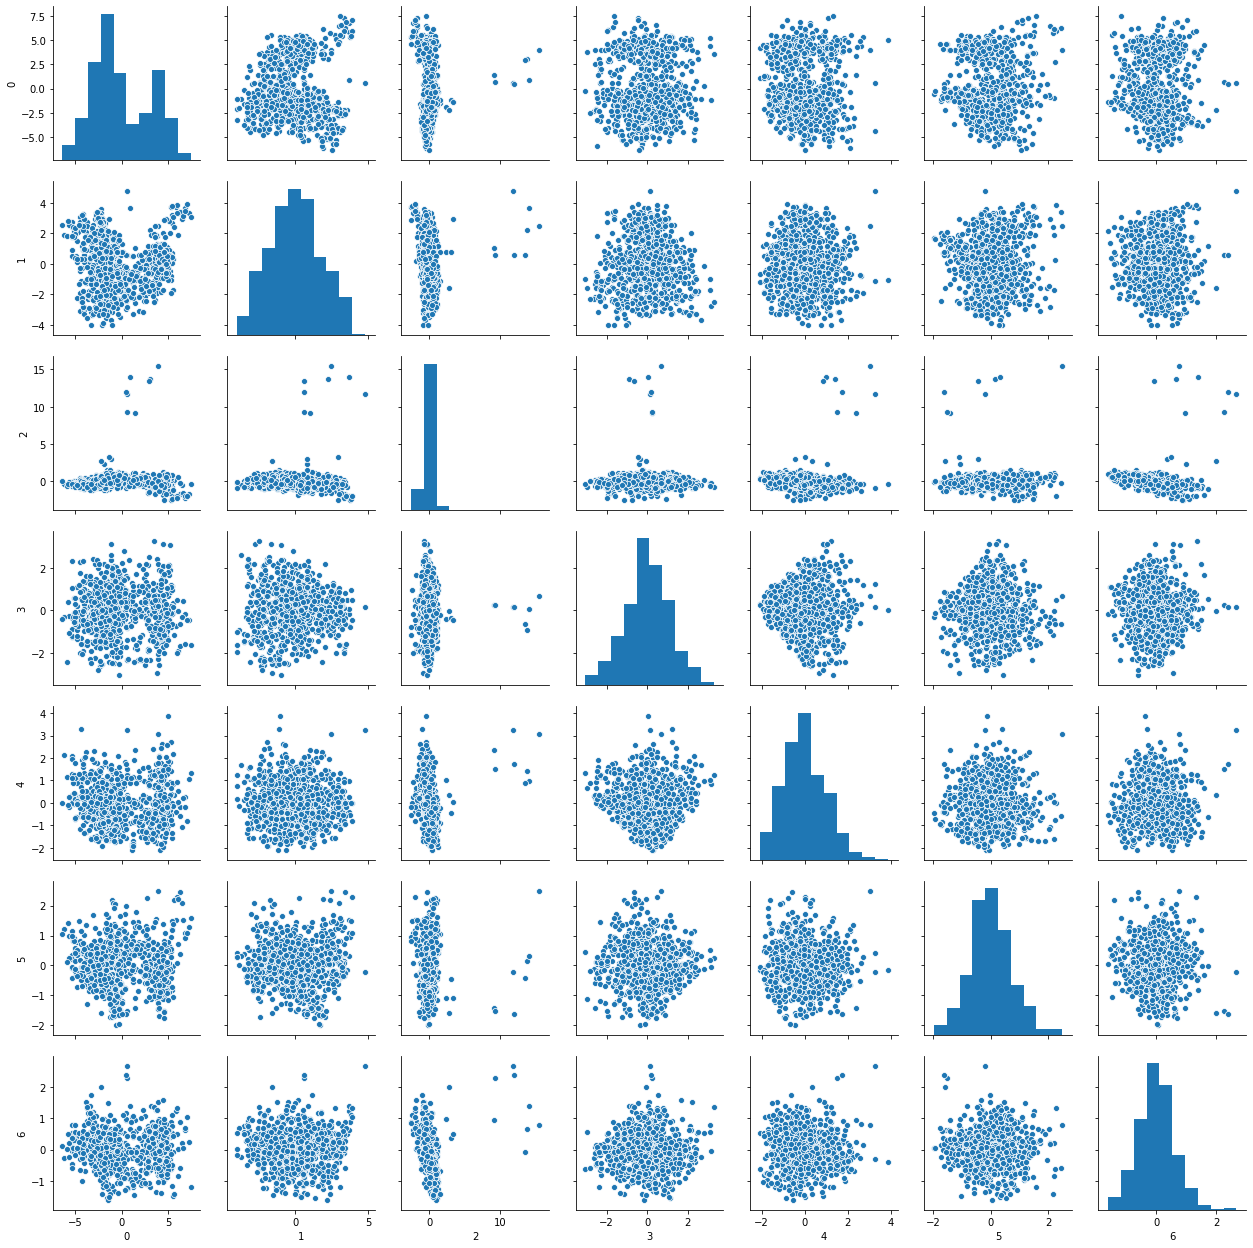

In [103]:
sns.pairplot(pd.DataFrame(Xpca3))
plt.show()

In [104]:
Xpca3_train, Xpca3_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.3, random_state=100)

In [105]:
# Building a Support Vector Machine on PCA train data
Xpca3_svc_model = SVC(C= 1, kernel='rbf', gamma= 1)
Xpca3_svc_model.fit(Xpca3_train, y_train)

Xpca3_y_pred = Xpca3_svc_model.predict(Xpca3_test)

cnf_matrix = metrics.confusion_matrix(y_test, Xpca3_y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, Xpca3_y_pred))
print(metrics.classification_report(y_test, Xpca3_y_pred))

[[ 52  18   2]
 [  5 113   1]
 [  0  17  46]]
Accuracy: 0.8307086614173228
              precision    recall  f1-score   support

           0       0.91      0.72      0.81        72
           1       0.76      0.95      0.85       119
           2       0.94      0.73      0.82        63

    accuracy                           0.83       254
   macro avg       0.87      0.80      0.82       254
weighted avg       0.85      0.83      0.83       254



In [106]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, Xpca3_y_pred))

Accuracy: 0.468503937007874
Accuracy: 0.8307086614173228


In [45]:
# We can see that after appling PCA and reducing the dimensions we were able to increase the accuracy of our model to 84%.

In [46]:
# Now 4 dimensions seems very reasonable. With 4 variables we can explain over 95% of the variation in the original data!
pca3_1 = PCA(n_components=4)
pca3_1.fit(vehicle)
print(pca3_1.components_)
print(pca3_1.explained_variance_ratio_)
Xpca3_1 = pca3_1.transform(vehicle)

[[ 0.27525946  0.29339234  0.30455645  0.26759321  0.0804939   0.09721986
   0.31687201 -0.31404236  0.31395301  0.28279042  0.30931053  0.31414903
   0.27200252 -0.02091798  0.04133167  0.05833316  0.03015605  0.07408137]
 [-0.12701086  0.12621713 -0.07268628 -0.18963519 -0.12215874  0.01072778
   0.04804731  0.01279915  0.06003514  0.1161825   0.06175369  0.05327578
   0.20927966  0.48854187 -0.0549212  -0.12415286 -0.54094767 -0.54027981]
 [-0.11987416 -0.0251835  -0.05600587  0.27506609  0.64204646  0.59179991
  -0.09765309  0.05746458 -0.10950917 -0.0169994   0.05646562 -0.10871143
  -0.03136852  0.28621109 -0.11569365 -0.07548784  0.00868929  0.03951431]
 [ 0.07831092  0.18752553 -0.07079597 -0.04225675  0.03285779  0.03131997
  -0.09598052  0.08273807 -0.09227073  0.18798762 -0.12037368 -0.09119937
   0.20010199 -0.06565297  0.60509275 -0.66574013  0.10561759  0.04766251]]
[0.52206485 0.16736054 0.10562382 0.0654932 ]


In [47]:
Xpca3_1

array([[ 3.32393198e-01, -2.18638382e-01,  1.00128619e+00,
         1.77327855e-01],
       [-1.59374091e+00, -4.20549398e-01, -3.69264301e-01,
         2.33484079e-01],
       [ 3.76753509e+00,  1.95040767e-01,  8.82372311e-02,
         1.20312936e+00],
       ...,
       [ 4.80780979e+00, -1.82373823e-03,  5.32772800e-01,
         2.95987951e-01],
       [-3.29572788e+00, -1.00880341e+00, -3.57467658e-01,
        -1.93324092e+00],
       [-4.76673461e+00,  3.34686477e-01, -5.68739264e-01,
        -1.22499022e+00]])

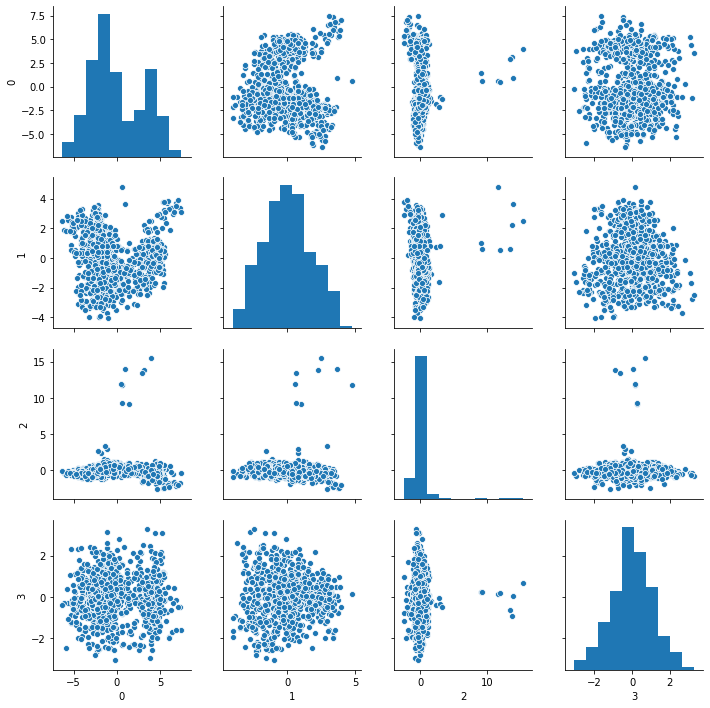

In [48]:
sns.pairplot(pd.DataFrame(Xpca3_1))
plt.show()

In [49]:
Xpca3_1_train, Xpca3_1_test, y_train, y_test = train_test_split(Xpca3_1, y, test_size=0.3, random_state=100)

In [50]:
# Building a Support Vector Machine on PCA train data
Xpca3_1_svc_model = SVC(C= 1, kernel='rbf', gamma= 1)
Xpca3_1_svc_model.fit(Xpca3_1_train, y_train)

Xpca3_1_y_pred = Xpca3_1_svc_model.predict(Xpca3_1_test)

cnf_matrix = metrics.confusion_matrix(y_test, Xpca3_1_y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, Xpca3_1_y_pred))
print(metrics.classification_report(y_test, Xpca3_1_y_pred))

[[ 52  16   4]
 [  6 103  10]
 [  6  17  40]]
Accuracy: 0.7677165354330708
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        72
           1       0.76      0.87      0.81       119
           2       0.74      0.63      0.68        63

    accuracy                           0.77       254
   macro avg       0.77      0.74      0.75       254
weighted avg       0.77      0.77      0.76       254



In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, Xpca3_1_y_pred))

Accuracy: 0.468503937007874
Accuracy: 0.7677165354330708


In [52]:
# if we reducing the dimensions to 4 we were able to increase the accuracy of our model to 77.5%.